<a href="https://colab.research.google.com/github/Yaroslav1405/RestaurantTipAnalysis/blob/main/Restaurant_Tips_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Working as a waiter is a very hard job. You have to always treat your guests the best. You are the face of the restaurant, while kitchen is the heart. But as we may know, hard work pays off. But how well does it pays for a waiter? Let's figure out. It is also interesting to see how generous are the people, and is there any pattern where people are more generous, than usual? Well, we are about to figure it out. Today we have data that was gathered by a waiter in some restaurant.

The data presented to us contains columns such as:

total_bill - total amount spent by guest(s);

tip - total tip left by guest(s);

sex - gender of a guest (we assume the person who paid for the table);

smoker - whether person is a smoker or no;

day - day of the visit (we assume server works from Thursday to Sunday);

time - time of the day (Lunch or Dinner);

size - size of the group;

We will start off familirazing ourselves with data.



---



# Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('tips.csv')

Let's print first 5 rows to see how our data looks like.

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


And now, we should see what datatypes are we dealing with, and just general info about our columns.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


Check for any missing values.

In [5]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Now, onto some short description for our numeric and text data.

In [6]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [7]:
df.describe(include='object').T

,count,unique,top,freq
sex,244,2,Male,157
smoker,244,2,No,151
day,244,4,Sat,87
time,244,2,Dinner,176


In [8]:
df.duplicated().value_counts()

False    243
True       1
Name: count, dtype: int64

In [9]:
df[df.duplicated(keep=False)]

,total_bill,tip,sex,smoker,day,time,size
198,13.0,2.0,Female,Yes,Thur,Lunch,2
202,13.0,2.0,Female,Yes,Thur,Lunch,2


Regularly, in the data when we have a duplicate, this could mean that it was written by mistake every next time. However, in this case we might have the same person going to the restaurant each week for two times, ordering same food, and leaving the same tip. Since we don't know, if this was just a mistake, or a person really visited restaurant two times ordering same food, let's just keep this row in our dataframe.

Let's focus on our average values for tips and bills.

In [10]:
average_bill = round(df['total_bill'].sum() / len(df['total_bill']), ndigits = 2)
average_tip = round(df['tip'].sum() / len(df['tip']), ndigits = 2)
tip_perc = round(100*(average_tip/average_bill), 2)
print(f'Average Bill: {average_bill}$ \nAverage Tip: {average_tip}$ \nAverage Tip Percentage: {tip_perc}%')


Average Bill: 19.79$ 
Average Tip: 3.0$ 
Average Tip Percentage: 15.16%


As we can see, on average people leave 15% tip of the total amount spent.

After doing little research on the web, we can conclude that 15% tip is average percentage for tips. Some websites suggest 15% tip "if you received average service", while some suggest that 15% is a minimum acceptable tip.

Althrough, it all depends on some factors like quality of service, quality of food, and a customer itself, it would be good to see the lowest tip percentage and the highest to understand how people tip our server.

In [11]:
# Calculate tip percentage for each row
df['tip_percentage'] = round(df['tip'] / df['total_bill'] * 100, 2)
# We will get the row index where we had the lowest tip

print("Index of min tip percentage: %s" % df['tip_percentage'].idxmin())
print("Index of max tip percentage: %s" % df['tip_percentage'].idxmax())

Index of min tip percentage: 237
Index of max tip percentage: 172


In [12]:
df.loc[[172, 237]]

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
172,7.25,5.15,Male,Yes,Sun,Dinner,2,71.03
237,32.83,1.17,Male,Yes,Sat,Dinner,2,3.56


Take a look at the day for lowest and highest tip percentage. It was during the weekend, lowest for Saturday, and highest for Sunday. This may play some role in our further analysis, so let's just keep thosedays in mind.

In [13]:
avg_tip_per_person = df['tip'].sum() / df['size'].sum()
print('Average tip per one person: %s$' % round(avg_tip_per_person,2))

Average tip per one person: 1.17$


Based on our calculations we let our waiter understand approximately how much tips he will receive from the table based on its size. It does not guarantee this amount, but it's rather an average.



---



## Data Visualization

We have done some analysis, but it will be better to have the data visualized, so this will be our next part of analysis.

In [14]:
# Define colors for graphs
hls = sns.color_palette("hls", 8)
set2 = sns.color_palette('Set2')

First of all, let's explore and gather insights from tips.

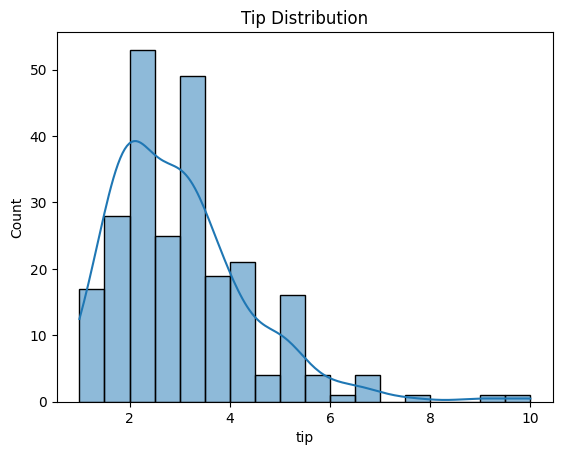

In [15]:
sns.histplot(data = df, x = 'tip', kde=True).set_title('Tip Distribution')
plt.show()

As we see, most of the tips lies either a little bit more than 2 dollars or a little bit less than 4 dollars. In generals, most of the tips are between this range.

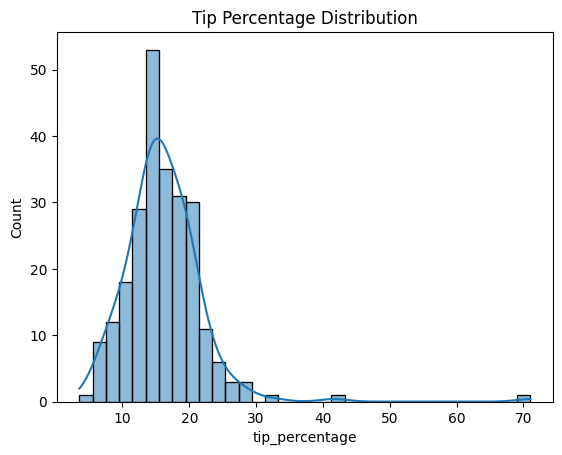

In [16]:
sns.histplot(data = df, x = 'tip_percentage', kde=True).set_title('Tip Percentage Distribution')
plt.show()

Here, most of the tips lies in 15%.

Let's figure out the difference between tips amount, if they are above average, or not.

In [17]:
df['tip_above_average'] = np.where(df['tip_percentage'] > 15, "Yes", "No")

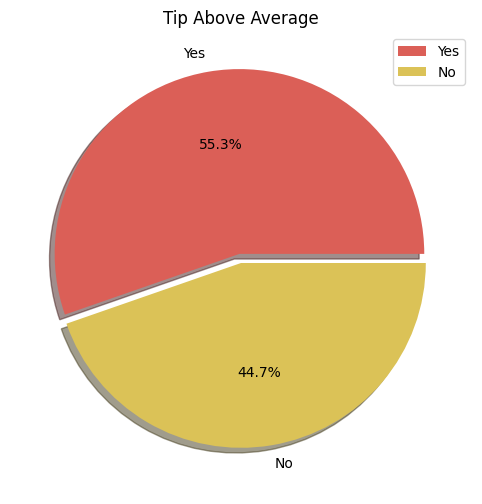

In [18]:
plt.figure(figsize=(8,6))
plt.pie(x = df['tip_above_average'].value_counts(), labels = ['Yes', 'No'], explode = [0.05, 0], shadow=True, autopct='%1.1f%%', colors=hls)
plt.title('Tip Above Average')
plt.legend()
plt.show()

Now, let's analyze our data using bar plots. We will start off by checking at what time do people usually tip more.

Also, it will be good to dig a little bit deeper to have more statistical values.

In [19]:
# Dinner Tip
print((df[df['time'] == 'Dinner']['tip']).describe())

count    176.000000
mean       3.102670
std        1.436243
min        1.000000
25%        2.000000
50%        3.000000
75%        3.687500
max       10.000000
Name: tip, dtype: float64


In [20]:
# Lunch Tip
print((df[df['time'] == 'Lunch']['tip']).describe())

count    68.000000
mean      2.728088
std       1.205345
min       1.250000
25%       2.000000
50%       2.250000
75%       3.287500
max       6.700000
Name: tip, dtype: float64


Although we have more data samples for dinner than for lunch, the restaurants are more populated during the evening time so, it is okay to have this difference between data.

Min values do not differ very much, but max values do differ by 3 dollars.

<ipython-input-21-9960f7e8b44b>:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  ax = sns.barplot(data=df, x='time', y='tip', hue='time', errorbar=None, palette=set2)


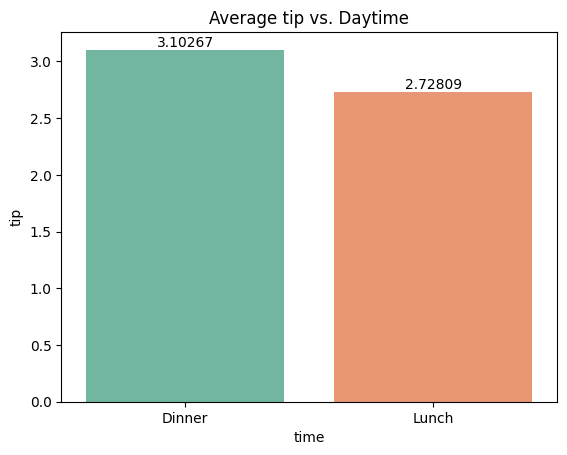

In [21]:
# Create the bar plot and assign to ax
ax = sns.barplot(data=df, x='time', y='tip', hue='time', errorbar=None, palette=set2)
ax.set_title('Average tip vs. Daytime')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

The bar plot shows the average tip amount for different time of the day. From the plot, we can see that there is a slight difference in average tip amounts between lunch and dinner, whereas on average, dinner has higher tip amount compared to lunch. Some may say, that this suggests that customers tend to tip more generously during dinner hours, but it's not quite right. To see how generous are our guests, we would need to see the fraction or percentage of the total amount paid, but this will be done further.



---



But first, let's quickly analyze some other data, to gather more insights. Is there any difference in tip amount between smoker and non-smoker?

<ipython-input-22-6754a17ea285>:1: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  ax = sns.barplot(df, x='smoker', y='tip', hue='smoker', errorbar=None, palette=sns.color_palette("Set2"))


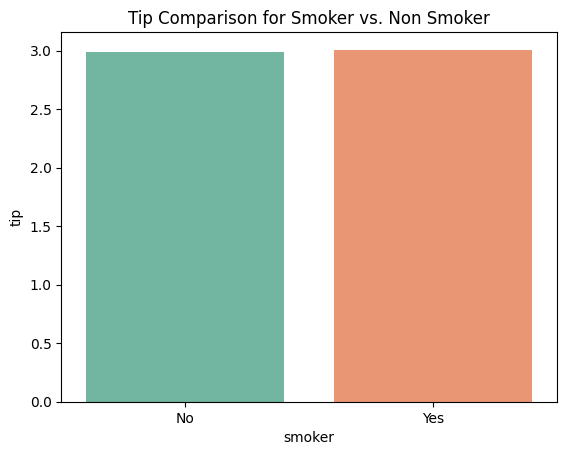

In [22]:
ax = sns.barplot(df, x='smoker', y='tip', hue='smoker', errorbar=None, palette=sns.color_palette("Set2"))
ax.set_title('Tip Comparison for Smoker vs. Non Smoker')
plt.show()

As we can see, on average, there is no effect on tip whether a guest is smoker or not.



---



Now, we would like to observe the proportion of our data observations by day. This can be done using pie chart, but for better visualization, we would like to have understandable labels.

In [23]:
df['day'] = df['day'].map({'Thur':'Thursday','Fri':'Friday','Sat':'Saturday','Sun':'Sunday'})

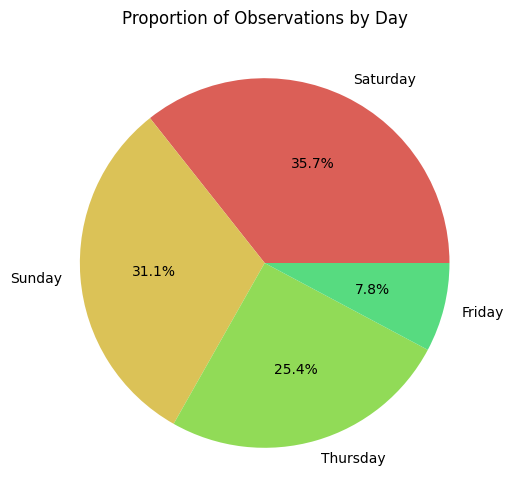

In [24]:
plt.figure(figsize=(8,6))
ax = df['day'].value_counts().plot.pie(autopct='%1.1f%%', colors=hls)
ax.set_ylabel('')
ax.set_title('Proportion of Observations by Day', size=12)
plt.show()

At this point, it would be great to see the average bill and average tip by day. It will give us idea, which day is most likely the most profitable for our waiter. Let's use bar plot to see this data.

<ipython-input-25-a6270bfa37e4>:1: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  ax = sns.barplot(df, x='day', y='tip', hue='day', errorbar=None, palette=hls)
<ipython-input-25-a6270bfa37e4>:4: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  ax = sns.barplot(data=df, x='day', y='total_bill', hue='day', errorbar=None, palette=hls)


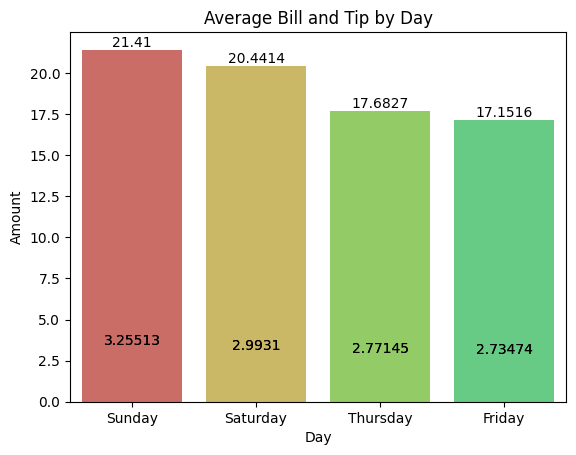

In [25]:
ax = sns.barplot(df, x='day', y='tip', hue='day', errorbar=None, palette=hls)
for container in ax.containers:
    ax.bar_label(container)
ax = sns.barplot(data=df, x='day', y='total_bill', hue='day', errorbar=None, palette=hls)
ax.set_title('Average Bill and Tip by Day')
for container in ax.containers:
    ax.bar_label(container)
ax.set_xlabel('Day')
ax.set_ylabel('Amount')
plt.show()

In [26]:
df[df['day'] == 'Sunday']['size'].value_counts()

size
2    39
4    18
3    15
5     3
6     1
Name: count, dtype: int64

Considering Saturday as the busiest day, Sunday as the highest average for bill and tip, we conclude that perhaps people tend to eat more on Sunday, because the size group is mostly 2 people which rarely will have higher tip than bigger group size.

After running the analysis on average tip by day, and total bill, we assume that guests tend to tip higher on the weekend(Sun,Sat), but, it is due to higher total bills on the weekend. So let's see in the next graph what the tip percentage reveals, to test our hypothesis.

<ipython-input-27-a420704073e3>:2: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  ax = sns.barplot(df, x='day', y='tip_percentage', hue='day', errorbar=None, palette=hls)


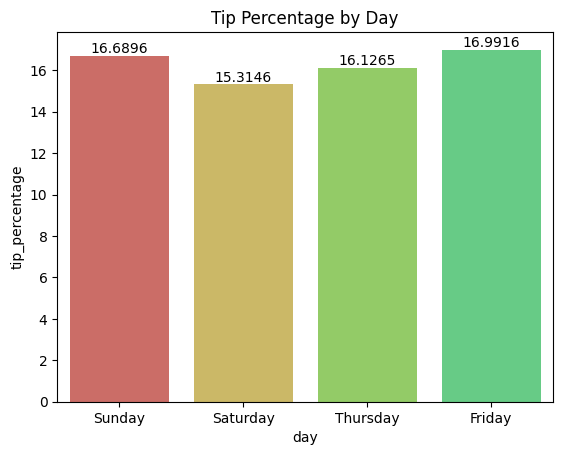

In [27]:
# Create Tip by Day graph
ax = sns.barplot(df, x='day', y='tip_percentage', hue='day', errorbar=None, palette=hls)
for container in ax.containers:
    ax.bar_label(container)
ax.set_title('Tip Percentage by Day')
plt.show()

So, very interesting to see, that weekends do have partial effect on tip percentage. People may be more generous on Fridays as most of them realize it is the end of a working week (not for all), and higher tip percentage on Sunday could mean that people had a good rest, and they respect our waiter, because we all know how hard and busy are restaurants during the weekend.  

Do you remember, that we had lowest tip percentage on Saturday, and highest on Sunday? Saturday has the lowest average tip percentage. But what is we drop these highest and smallest values? Will anything change?

In [28]:
df_new = df.drop([172,237], axis=0)

<ipython-input-29-6fb8520b134d>:2: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  ax = sns.barplot(df_new, x='day', y='tip_percentage', hue='day', errorbar=None, palette=hls)


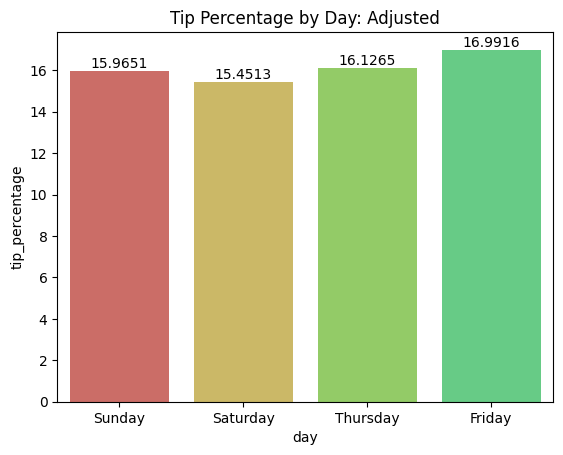

In [29]:
# Create Tip by Day graph
ax = sns.barplot(df_new, x='day', y='tip_percentage', hue='day', errorbar=None, palette=hls)
for container in ax.containers:
    ax.bar_label(container)
ax.set_title('Tip Percentage by Day: Adjusted')
plt.show()

Well, Saturday is still at the bottom, but tip percentage increased by .14, but Sunday is now down by .5 percent. Some outliers make difference, but not all.

As we said earlier: "hard work pays off", and let's see at what day.  

In [30]:
total_tip_day = df.groupby('day')['tip'].sum().reset_index()

<ipython-input-31-8467fc382ff7>:1: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  ax = sns.barplot(data=total_tip_day, x='day', y='tip', hue = 'day', palette=set2)


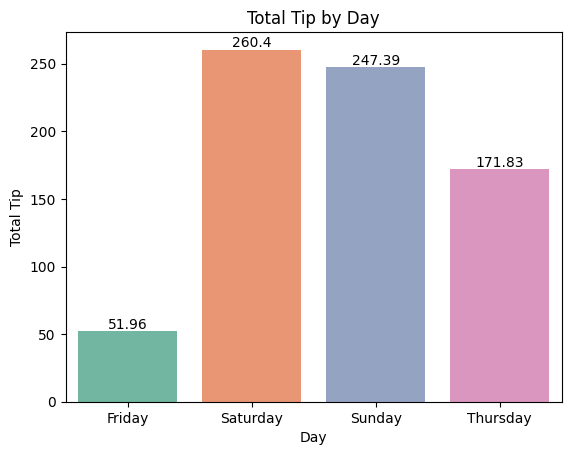

In [31]:
ax = sns.barplot(data=total_tip_day, x='day', y='tip', hue = 'day', palette=set2)
for container in ax.containers:
  ax.bar_label(container)
ax.set_xlabel('Day')
ax.set_ylabel('Total Tip')
ax.set_title('Total Tip by Day')
plt.show()

Hmm... well, working on weekends really pays off, but Saturday as the highest total tip is pretty interesting. It has lowest tip percentage, but highest number of records. The Saturday is the most loaded day, and waiters would need a good rest after it.



---



Let's examine different gender groups to determine which has a higher average tip.

<ipython-input-32-71c632b08317>:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  ax = sns.boxplot(df, x='sex', y='tip', hue='sex', palette=sns.color_palette("Set2"))


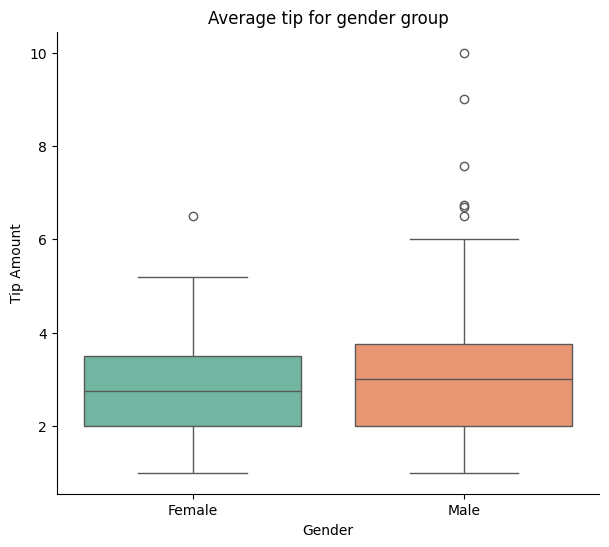

In [32]:
plt.figure(figsize=(7,6))
ax = sns.boxplot(df, x='sex', y='tip', hue='sex', palette=sns.color_palette("Set2"))
ax.set_title('Average tip for gender group')
ax.set_xlabel("Gender")
ax.set_ylabel('Tip Amount')
sns.despine()
plt.show()

Our analysis indicates that the male group tends to tip higher.

Should we combine two factors that make a difference to gather more insights? Of course!

<ipython-input-33-ca2a9e88c538>:1: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  ax =sns.barplot(df, x='day', y='tip_percentage', hue='sex',errorbar=None, palette=sns.color_palette("Set2"))


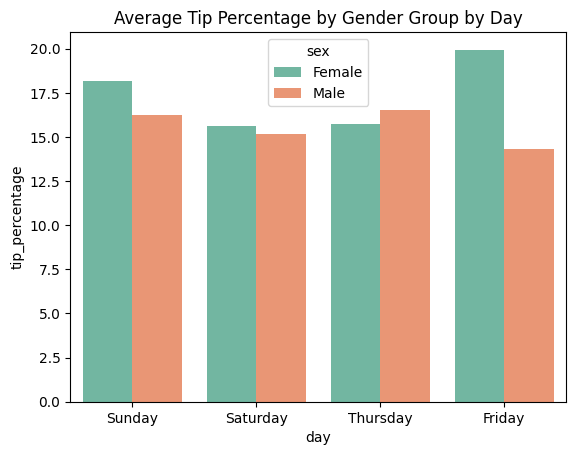

In [33]:
ax =sns.barplot(df, x='day', y='tip_percentage', hue='sex',errorbar=None, palette=sns.color_palette("Set2"))
ax.set_title('Average Tip Percentage by Gender Group by Day')
plt.show()

On Fridays females are significantly more generous than males! They are the ones who makes a difference!



---



Okay, before this, we analyzed average and total tips by days, compared different groups together, but we haven't touched size of groups yet.

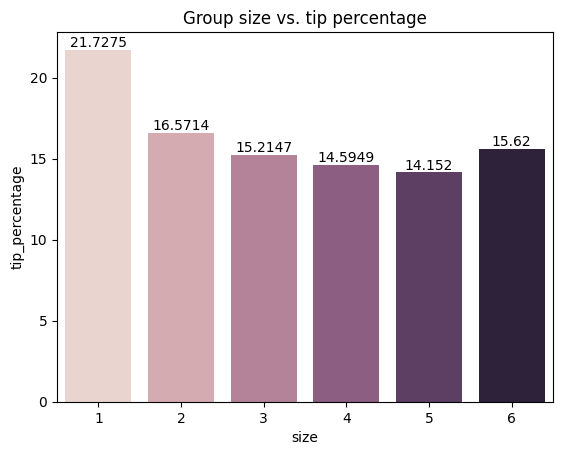

In [34]:
ax = sns.barplot(data=df, x='size', y='tip_percentage', hue='size', errorbar=None, legend=None)
ax.set_title('Group size vs. tip percentage')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

Of course, more guests would usually mean higher tip, which is also proved by our analysis above (average tip amount per guest). However, by exploring the graph above, we observe that single guests are generally the most generous when tipping a server.

<ipython-input-35-696343e65526>:1: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  ax = sns.barplot(data=df, x='size', y='tip_percentage', hue='sex', errorbar=None, palette = sns.color_palette('Set2'))


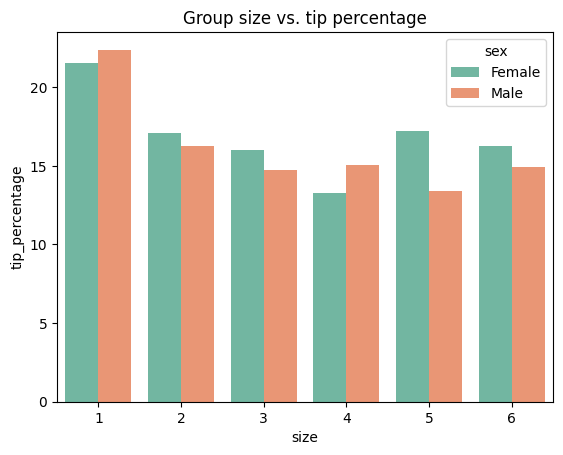

In [35]:
ax = sns.barplot(data=df, x='size', y='tip_percentage', hue='sex', errorbar=None, palette = sns.color_palette('Set2'))
ax.set_title('Group size vs. tip percentage')

plt.show()

And this works for both, males and females.

<ipython-input-36-70f8c5687793>:3: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.barplot(data=df_single, x='day', y='tip', hue='day', palette=hls, errorbar=None)


<Axes: xlabel='day', ylabel='tip'>

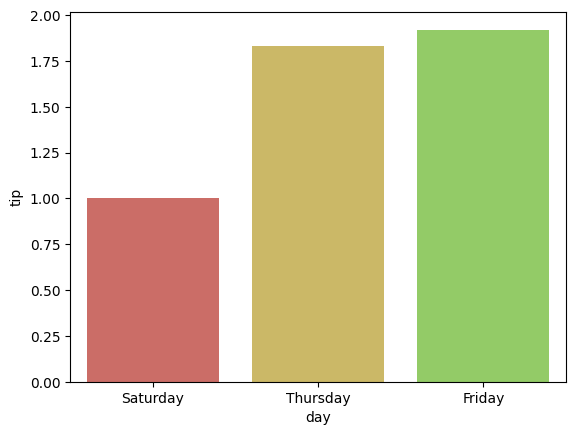

In [36]:
df_single = df[df['size'] == 1]

sns.barplot(data=df_single, x='day', y='tip', hue='day', palette=hls, errorbar=None)

Highest average tip for waiter and group of only 1 person is on Friday, with almost $2.0

Since there is no data for Sunday, we assume that group of 1 never visited restaurant on Sunday.



---



Now, let's see how things are related to each other. For this we first need to one-hot encode our day column, and convert all other columns into numeric types.

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_bill         244 non-null    float64
 1   tip                244 non-null    float64
 2   sex                244 non-null    object 
 3   smoker             244 non-null    object 
 4   day                244 non-null    object 
 5   time               244 non-null    object 
 6   size               244 non-null    int64  
 7   tip_percentage     244 non-null    float64
 8   tip_above_average  244 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 17.3+ KB


In [38]:
df_copy = df.copy()
df_copy['tip_above_average'] = df_copy['tip_above_average'].map({'Yes': 1, 'No': 0})
df_copy['sex'] = df_copy['sex'].map({'Male': 1, 'Female': 0})
df_copy['smoker'] = df_copy['smoker'].map({'Yes': 1, 'No': 0})
df_copy['time'] = df_copy['time'].map({'Dinner': 1, 'Lunch': 0})
df_copy = df_copy.join(df_copy.day.str.get_dummies())
df_copy = df_copy.drop('day', axis=1)



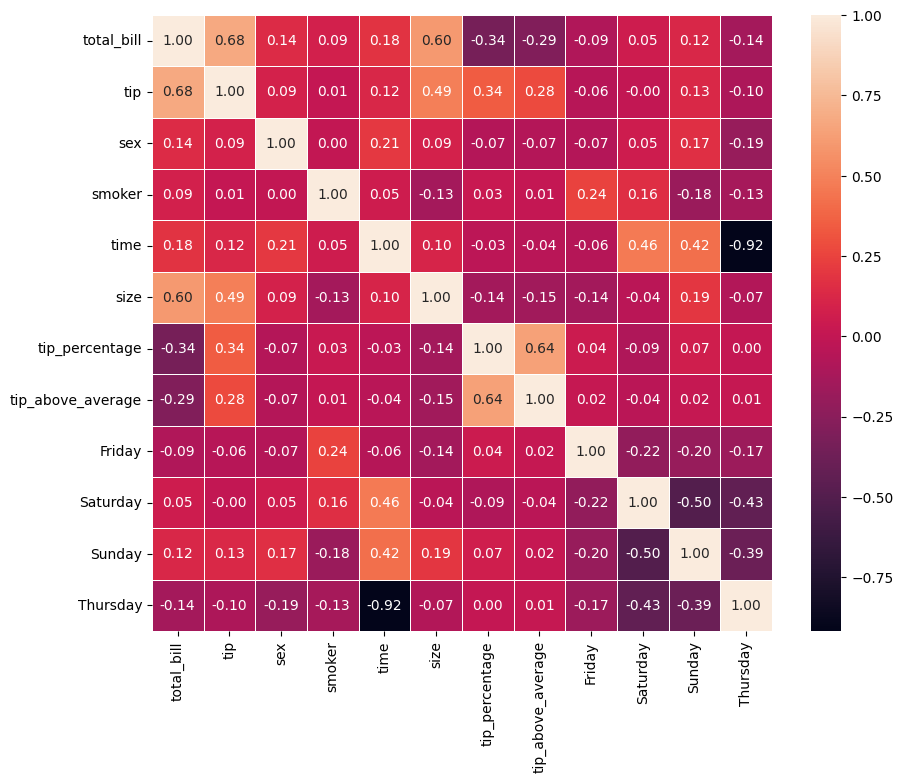

In [39]:
plt.figure(figsize = (10,8))
sns.heatmap(data = df_copy.corr(), annot=True, fmt='.2f',linewidth=0.5)
plt.show()

This heatmap is generally to support our observations and conclusions that we made before. If we were to take just tip, we can see that of course, it is highly correlated with total bill (higher bill will most likely mean bigger tip amount). Size of the group is the second factor of getting bigger tip. And we can also see that time, and day(Sunday) has some correlation with tip amount (as total bills during dinner are higher, and Sunday has also highest total bills).





---



# Conclusion

|After exploring our data, and gaining insights, we could draw some conclusions, but an important thing to keep in mind, is that we only had 244 samples, which is not as many as we would like to have. However, based on our dataset, we conclude that during Saturday people are least generous, it is the most profitable day for waiter. On Sundays, most people come as a group of two, which is second highest tip percentage group.

Groups with only 1 person are the most generous when tipping a waiter. Also, on Fridays people are most generous as well. To be more specific, females on Fridays are the most generous.

So, if it is a Friday evening time, you see a single Female coming in to a restaurant, it will be most likely the most generous guest. But if you see, a group of 6 entering the restaurant, you can expect on average $7.02 tips.



---



# Future Work

By exploring our data we found some correlation between the data. We also were able to find some patterns, but more data eliminates the factor of luck, and create better statistical vision, so it would be great to collect more data. Improved data collection could also potentially lead to better analysis. For example, if we could have meal types ordered by table (e.g. soup, meat, salad, etc.) this could open whole new section for our analysis.
A quick review left by guests would also help us improve our analysis (such review could consist of how good was their meal, how was the service, etc).

There is a lot of potential in exploring topic of restaurant sector and it is not limited to just tip analysis. Exploring it deep enough can benefit all: visitors, waiters, and restaurant business in general. But all of this can be done with having more data that is relevant for analysis.